# SUPERVISED LEARNING REGRESSION

## Import Dataset

In [122]:
#we import all libraries that we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [85]:
#we import all tables data as dataframe
df_test = pd.read_csv(r'D:\TODO\GITHUB\DataScience\SUPERVISED_LEARNING_REGRESSION\FILES\test.csv')
df_test = df_test.set_index('PassengerId')
df_train = pd.read_csv(r'D:\TODO\GITHUB\DataScience\SUPERVISED_LEARNING_REGRESSION\FILES\train.csv')
df_train = df_train.set_index('PassengerId')

In [86]:
#show the first five rows of df_test
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [87]:
#show the first five rows of df_test
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [88]:
#set the target and features
X = df_train.drop(['Transported','Name'], axis = 1)
y = df_train['Transported']
X_test = df_test.drop('Name', axis = 1)

In [89]:
X.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [90]:
y.head()

PassengerId
0001_01    False
0002_01     True
0003_01    False
0003_02    False
0004_01     True
Name: Transported, dtype: bool

## Data Pre-processing

### Data cleaning

In [91]:
#how missing value have we in df_train?
missing_values_train = df_train.isnull().sum()
print(missing_values_train)
print(df_train.shape)



HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
(8693, 13)


In [92]:
#how missing value have we in df_test?
missing_values_test = df_test.isnull().sum()
print(missing_values_test)
print(df_test.shape)

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
(4277, 12)


In [93]:
X.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [94]:
X_test.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [95]:
#changes missing values in HomePlanet to mode
X['HomePlanet'].fillna('Earth', inplace=True)
X_test['HomePlanet'].fillna('Earth', inplace=True)
#changes missing values in CryoSleeop to mode
X['CryoSleep'].fillna(False, inplace=True)
X_test['CryoSleep'].fillna(False, inplace=True)
#changes missing values in Cabin to mode
X['Cabin'].fillna('AS', inplace=True)
X_test['Cabin'].fillna('AS', inplace=True)
#changes missing values in Destination to mode
X['Destination'].fillna('TRAPPIST-1e', inplace=True)
X_test['Destination'].fillna('TRAPPIST-1e', inplace=True)
#changes missing values in Age to mode
X['Age'].fillna(24.0, inplace=True)
X_test['Age'].fillna(24.0, inplace=True)
#changes missing values in VIP to mode
X['VIP'].fillna(False, inplace=True)
X_test['VIP'].fillna(False, inplace=True)
#changes missing values in RoomService to mode
X['RoomService'].fillna(0, inplace=True)
X_test['RoomService'].fillna(0, inplace=True)
#changes missing values in FoodCourt to mode
X['FoodCourt'].fillna(0, inplace=True)
X_test['FoodCourt'].fillna(0, inplace=True)
#changes missing values in ShoppingMall to mode
X['ShoppingMall'].fillna(0, inplace=True)
X_test['ShoppingMall'].fillna(0, inplace=True)
#changes missing values in Spa to mode
X['Spa'].fillna(0, inplace=True)
X_test['Spa'].fillna(0, inplace=True)
#changes missing values in VRDeck to mode
X['VRDeck'].fillna(0, inplace=True)
X_test['VRDeck'].fillna(0, inplace=True)

In [96]:
X.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [97]:
X_test.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

### Data Transformation

In [98]:
# column CryopSleep
X['CryoSleep'] = X['CryoSleep'].astype(bool)
X['CryoSleep'] = X['CryoSleep'].astype(int)
X_test['CryoSleep'] = X_test['CryoSleep'].astype(bool)
X_test['CryoSleep'] = X_test['CryoSleep'].astype(int)
# column VIP
X['VIP'] = X['VIP'].astype(bool)
X['VIP'] = X['VIP'].astype(int)
X_test['VIP'] = X_test['VIP'].astype(bool)
X_test['VIP'] = X_test['VIP'].astype(int)

In [99]:
#know there are many different data, but will use the last parameter P/S and change to Binary values
# P('Port') = 1, S('Starport') = 0
for i in range(0, len(X)):
    if X['Cabin'][i][-1] == 'P':
        X['Cabin'][i] = 'True'
    elif X['Cabin'][i][-1] == 'S':
        X['Cabin'][i] = 'False'
for i in range(0, len(X_test)):
    if X_test['Cabin'][i][-1] == 'P':
        X_test['Cabin'][i] = 'True'
    elif X_test['Cabin'][i][-1] == 'S':
        X_test['Cabin'][i] = 'False'
    

C:\Users\lhern\AppData\Local\Temp\ipykernel_13888\9344036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cabin'][i] = 'True'
C:\Users\lhern\AppData\Local\Temp\ipykernel_13888\9344036.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cabin'][i] = 'False'
C:\Users\lhern\AppData\Local\Temp\ipykernel_13888\9344036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Cabin'][i] = 'False'
C:\Users\lhern\AppData\Local\Tem

In [100]:
X['Cabin'] = X['Cabin'].astype(bool)
X['Cabin'] = X['Cabin'].astype(int)
X_test['Cabin'] = X_test['Cabin'].astype(bool)
X_test['Cabin'] = X_test['Cabin'].astype(int)

In [101]:
X.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,,
0001_01,Europa,0,1,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0
0002_01,Earth,0,1,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0
0003_01,Europa,0,1,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0
0003_02,Europa,0,1,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0
0004_01,Earth,0,1,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0


In [102]:
X.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [103]:
X_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,,
0013_01,Earth,1,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0
0018_01,Earth,0,1,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0
0019_01,Europa,1,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0
0021_01,Europa,0,1,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0
0023_01,Earth,0,1,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0


In [104]:
X_test.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

## Feature Scaling

In [105]:
#Feature Scaling from RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
max_RoomService = X['RoomService'].max()
max_FoodCourt = X['FoodCourt'].max()
max_ShoppingMall = X['ShoppingMall'].max()
max_Spa = X['Spa'].max()
max_VRDeck = X['VRDeck'].max()
max_RoomService_test = X_test['RoomService'].max()
max_FoodCourt_test = X_test['FoodCourt'].max()
max_ShoppingMall_test = X_test['ShoppingMall'].max()
max_Spa_test = X_test['Spa'].max()
max_VRDeck_test = X_test['VRDeck'].max()
for i in range(0,len(X)):
    X['RoomService'][i] = X['RoomService'][i]/max_RoomService
    X['FoodCourt'][i] = X['FoodCourt'][i]/max_FoodCourt
    X['ShoppingMall'][i] = X['ShoppingMall'][i]/max_ShoppingMall
    X['Spa'][i] = X['Spa'][i]/max_Spa
    X['VRDeck'][i] = X['VRDeck'][i]/max_VRDeck
for i in range(0,len(X_test)):
    X_test['RoomService'][i] = X_test['RoomService'][i]/max_RoomService_test
    X_test['FoodCourt'][i] = X_test['FoodCourt'][i]/max_FoodCourt_test
    X_test['ShoppingMall'][i] = X_test['ShoppingMall'][i]/max_ShoppingMall_test
    X_test['Spa'][i] = X_test['Spa'][i]/max_Spa_test
    X_test['VRDeck'][i] = X_test['VRDeck'][i]/max_VRDeck_test

C:\Users\lhern\AppData\Local\Temp\ipykernel_13888\779940478.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RoomService'][i] = X['RoomService'][i]/max_RoomService
C:\Users\lhern\AppData\Local\Temp\ipykernel_13888\779940478.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['FoodCourt'][i] = X['FoodCourt'][i]/max_FoodCourt
C:\Users\lhern\AppData\Local\Temp\ipykernel_13888\779940478.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [106]:
X.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,,
0001_01,Europa,0,1,TRAPPIST-1e,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000
0002_01,Earth,0,1,TRAPPIST-1e,24.0,0,0.007608,0.000302,0.001064,0.024500,0.001823
0003_01,Europa,0,1,TRAPPIST-1e,58.0,1,0.003001,0.119948,0.000000,0.299670,0.002030
0003_02,Europa,0,1,TRAPPIST-1e,33.0,0,0.000000,0.043035,0.015793,0.148563,0.007997
0004_01,Earth,0,1,TRAPPIST-1e,16.0,0,0.021149,0.002348,0.006428,0.025214,0.000083


## Categorical Variables

In [135]:
categorical_col = ['HomePlanet','Destination']
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_valid = pd.DataFrame(OH_encoder.fit_transform(X[categorical_col]))
OH_cols_valid_test = pd.DataFrame(OH_encoder.fit_transform(X_test[categorical_col]))

# One-hot encoding removed index; put it back
OH_cols_valid.index = X.index
OH_cols_valid_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_valid = X.drop(X[categorical_col], axis=1)
num_X_valid_test = X_test.drop(X_test[categorical_col], axis=1)

# Add one-hot encoded columns to numerical features
X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
X_test_valid = pd.concat([num_X_valid_test, OH_cols_valid_test], axis=1)

c:\Users\lhern\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\lhern\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [136]:
X_valid.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,0,1,2,3,4,5
PassengerId,,,,,,,,,,,,,,,
0001_01,0,1,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
0002_01,0,1,24.0,0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,0.0,0.0,0.0,0.0,1.0
0003_01,0,1,58.0,1,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,1.0,0.0,0.0,0.0,1.0
0003_02,0,1,33.0,0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,1.0,0.0,0.0,0.0,1.0
0004_01,0,1,16.0,0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,0.0,0.0,0.0,0.0,1.0


In [137]:
X_valid.rename(columns={0:'Earth',1:'Europa',2:'Mars',3:'TRAPPIST-1e',4:'PSO J318.5-22',5:'55 Cancri e'}, inplace=True)
X_test_valid.rename(columns={0:'Earth',1:'Europa',2:'Mars',3:'TRAPPIST-1e',4:'PSO J318.5-22',5:'55 Cancri e'}, inplace=True)

In [138]:
X_valid.isnull().sum()

CryoSleep        0
Cabin            0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Earth            0
Europa           0
Mars             0
TRAPPIST-1e      0
PSO J318.5-22    0
55 Cancri e      0
dtype: int64

In [139]:
X_test_valid.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,TRAPPIST-1e,PSO J318.5-22,55 Cancri e
PassengerId,,,,,,,,,,,,,,,
0013_01,1,1,27.0,0,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0
0018_01,0,1,19.0,0,0.000000,0.000356,0.00000,0.142260,0.000000,1.0,0.0,0.0,0.0,0.0,1.0
0019_01,1,1,31.0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0
0021_01,0,1,38.0,0,0.000000,0.263206,0.00000,0.009121,0.026266,0.0,1.0,0.0,0.0,0.0,1.0
0023_01,0,1,20.0,0,0.000865,0.000000,0.07658,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0


In [140]:
len(X_test_valid)

4277

In [141]:
X_test_valid.isnull().sum()

CryoSleep        0
Cabin            0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Earth            0
Europa           0
Mars             0
TRAPPIST-1e      0
PSO J318.5-22    0
55 Cancri e      0
dtype: int64

## Fit the model

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree


In [144]:
X_train_full, X_test_full, y_train, y_valid = train_test_split(X_valid, y, train_size=0.8, test_size=0.2, random_state = 0 )

In [145]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 42)
tree.fit(X_train_full,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [146]:
pred_y = tree.predict(X_test_full)
accuracy_score(pred_y, y_valid)

0.7147786083956297

In [147]:
pred_y_test_valid  = tree.predict(X_test_valid)
print(pred_y_test_valid)

[ True False  True ...  True False  True]


In [148]:
X_test_new = X_test_valid.assign(Transported = pred_y_test_valid)
X_test_new

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,TRAPPIST-1e,PSO J318.5-22,55 Cancri e,Transported
PassengerId,,,,,,,,,,,,,,,,
0013_01,1,1,27.0,0,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,True
0018_01,0,1,19.0,0,0.000000,0.000356,0.00000,0.142260,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,False
0019_01,1,1,31.0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,True
0021_01,0,1,38.0,0,0.000000,0.263206,0.00000,0.009121,0.026266,0.0,1.0,0.0,0.0,0.0,1.0,False
0023_01,0,1,20.0,0,0.000865,0.000000,0.07658,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,1,1,34.0,0,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,True
9269_01,0,1,42.0,0,0.000000,0.033514,0.00205,0.000504,0.006466,1.0,0.0,0.0,0.0,0.0,1.0,False
9271_01,1,1,24.0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,True


In [149]:
X_test_new.to_csv("submission.csv", columns=["Transported"])

In [150]:
len(X_test_new)

4277

<Axes: >

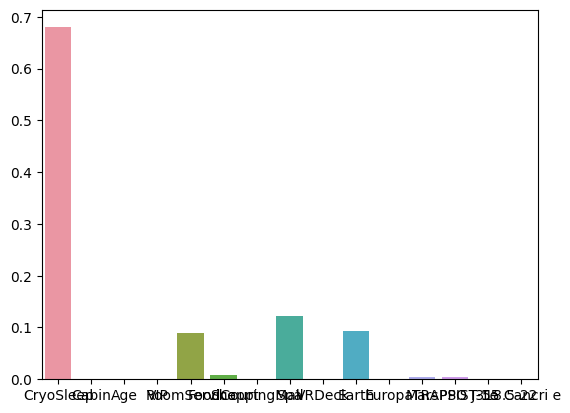

In [155]:
importancias = tree.feature_importances_
columnas = X_valid.columns
# creamos el gráfico
sns.barplot(x = columnas, y= importancias, orient='v')
